In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
cd /content/gdrive/My Drive

[Errno 2] No such file or directory: '/content/gdrive/My Drive'
/content


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mush = pd.read_csv('mushrooms.csv')

In [ ]:
# 변수 추가 및 삭제
def var_del(mush):
    del_col = ["stalk-root", "veil-type"]
    mush.drop(del_col, axis=1, inplace=True)
    
    return mush

In [ ]:
# 변수 선택
def var_select(mush):
    # 'habitat', 'stalk-surface-below-ring', 'stalk-shape',
    cols = ['class',  'population', 'gill-color', 'gill-spacing', 'stalk-surface-above-ring', 'spore-print-color','ring-type', 'bruises', 'odor', 'gill-size']
    mush = mush[cols]

    return mush

In [ ]:
def transform_features(mush):
    mush = var_del(mush)
    mush = var_select(mush)
    return mush

In [ ]:
mush = transform_features(mush)

In [ ]:
X = mush.iloc[:,1:]
y = mush['class']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

onehot = OneHotEncoder()
onehot.fit(X)
X = onehot.transform(X).toarray()

labenc = LabelEncoder()
y = labenc.fit_transform(y)
 # 0-edible, 1-poisnous

In [ ]:
X_train.shape

(6499, 27)

In [ ]:
# 랜덤 샘플링
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 평가 기준

In [ ]:
from sklearn.model_selection import cross_validate

# Train CV 결과
def CV_check(model, X, Y):
    CV_df = pd.DataFrame(cross_validate(model, X, Y, scoring=scoring, cv=5))
    CV_df = CV_df.iloc[:,2:]
    CV_df.columns = scoring

    print('[Train] \n')
    print("5-fold CV Clasification report:\n")
    print(CV_df,"\n\n")
    print("Mean Scores:\n")
    for score in scoring:
        print(f"\t{score}: {round(CV_df[score].mean(),4)}")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

# Train Data CV 결과 이용한 ROC
def plt_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14)
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)

def ROC_check(model, X, Y):
    # y_scores = model.predict_proba(X)
    y_scores = cross_val_predict(model, X, Y, cv=5, method='predict_proba')
    fpr, tpr, thresholds = roc_curve(Y, y_scores[:,1])
    auc = roc_auc_score(y_train, y_scores[:,1])

    plt.figure(figsize = (6,6))
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([-.1,1.1,-.1,1.1])
    plt_roc_curve(fpr,tpr, 'LOGISTIC')
    plt.legend(loc='lower right')
    plt.title('ROC curve', fontsize=16)
    plt.grid(True)
    plt.show()

    print('\nAUC: ', auc)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Test에 사용 (CV 안함)
def error_result_check(model, X, Y):
    pred = model.predict(X)

    confu = confusion_matrix(y_true=Y, y_pred=pred)
    print('\n\n[Test] \n')
    print("Confusion Matrix: \n")
    print(confu, '\n')

    acc = accuracy_score(y_true=Y, y_pred=pred)    
    print('Test Accuracy: ', round(acc,4))

In [ ]:
scoring = ['accuracy','precision', 'recall','f1']

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression()
logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[Train] 

5-fold CV Clasification report:

   accuracy  precision    recall        f1
0  1.000000        1.0  1.000000  1.000000
1  0.999231        1.0  0.998413  0.999206
2  1.000000        1.0  1.000000  1.000000
3  0.997692        1.0  0.995238  0.997613
4  0.999230        1.0  0.998413  0.999206 


Mean Scores:

	accuracy: 0.9992
	precision: 1.0
	recall: 0.9984
	f1: 0.9992


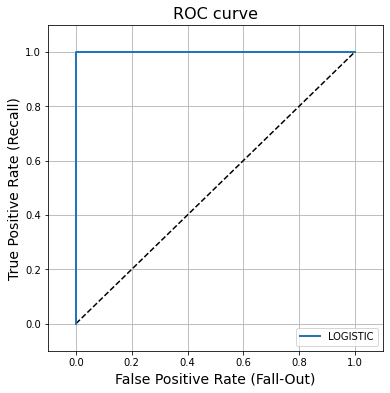


AUC:  0.9999991468828806


[Test] 

Confusion Matrix: 

[[3348    0]
 [   5 3146]] 

Test Accuracy:  0.9992


In [ ]:
CV_check(logis, X_train, y_train)
ROC_check(logis, X_train, y_train)
error_result_check(logis, X_train, y_train)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Train] 

5-fold CV Clasification report:

   accuracy  precision  recall   f1
0       1.0        1.0     1.0  1.0
1       1.0        1.0     1.0  1.0
2       1.0        1.0     1.0  1.0
3       1.0        1.0     1.0  1.0
4       1.0        1.0     1.0  1.0 


Mean Scores:

	accuracy: 1.0
	precision: 1.0
	recall: 1.0
	f1: 1.0


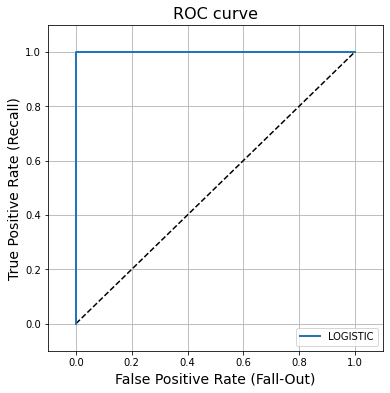


AUC:  1.0


[Test] 

Confusion Matrix: 

[[3348    0]
 [   0 3151]] 

Test Accuracy:  1.0


In [ ]:
CV_check(dt, X_train, y_train)
ROC_check(dt, X_train, y_train)
error_result_check(dt, X_train, y_train)

변수 줄여도 여전히 Decision Tree만 이용해도 충분히 높은 Accuracy 도출

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[Train] 

5-fold CV Clasification report:

   accuracy  precision  recall   f1
0       1.0        1.0     1.0  1.0
1       1.0        1.0     1.0  1.0
2       1.0        1.0     1.0  1.0
3       1.0        1.0     1.0  1.0
4       1.0        1.0     1.0  1.0 


Mean Scores:

	accuracy: 1.0
	precision: 1.0
	recall: 1.0
	f1: 1.0


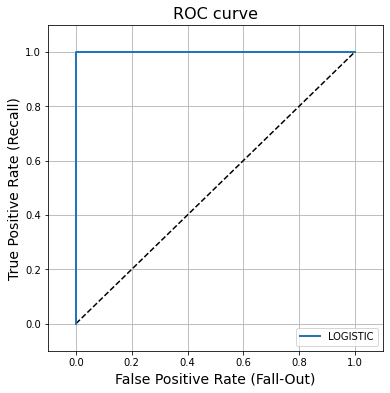


AUC:  1.0


[Test] 

Confusion Matrix: 

[[3348    0]
 [   0 3151]] 

Test Accuracy:  1.0


In [ ]:
CV_check(rf, X_train, y_train)
ROC_check(rf, X_train, y_train)
error_result_check(rf, X_train, y_train)

In [ ]:
cat_col =  [cname for cname in mush.columns if (mush[cname].dtype == "object") & (cname != 'class')]
name_col = []

for cat in cat_col:
    name_col = name_col + list(map(lambda x: cat + '_' + x, mush[cat].unique()))

len(name_col)

51

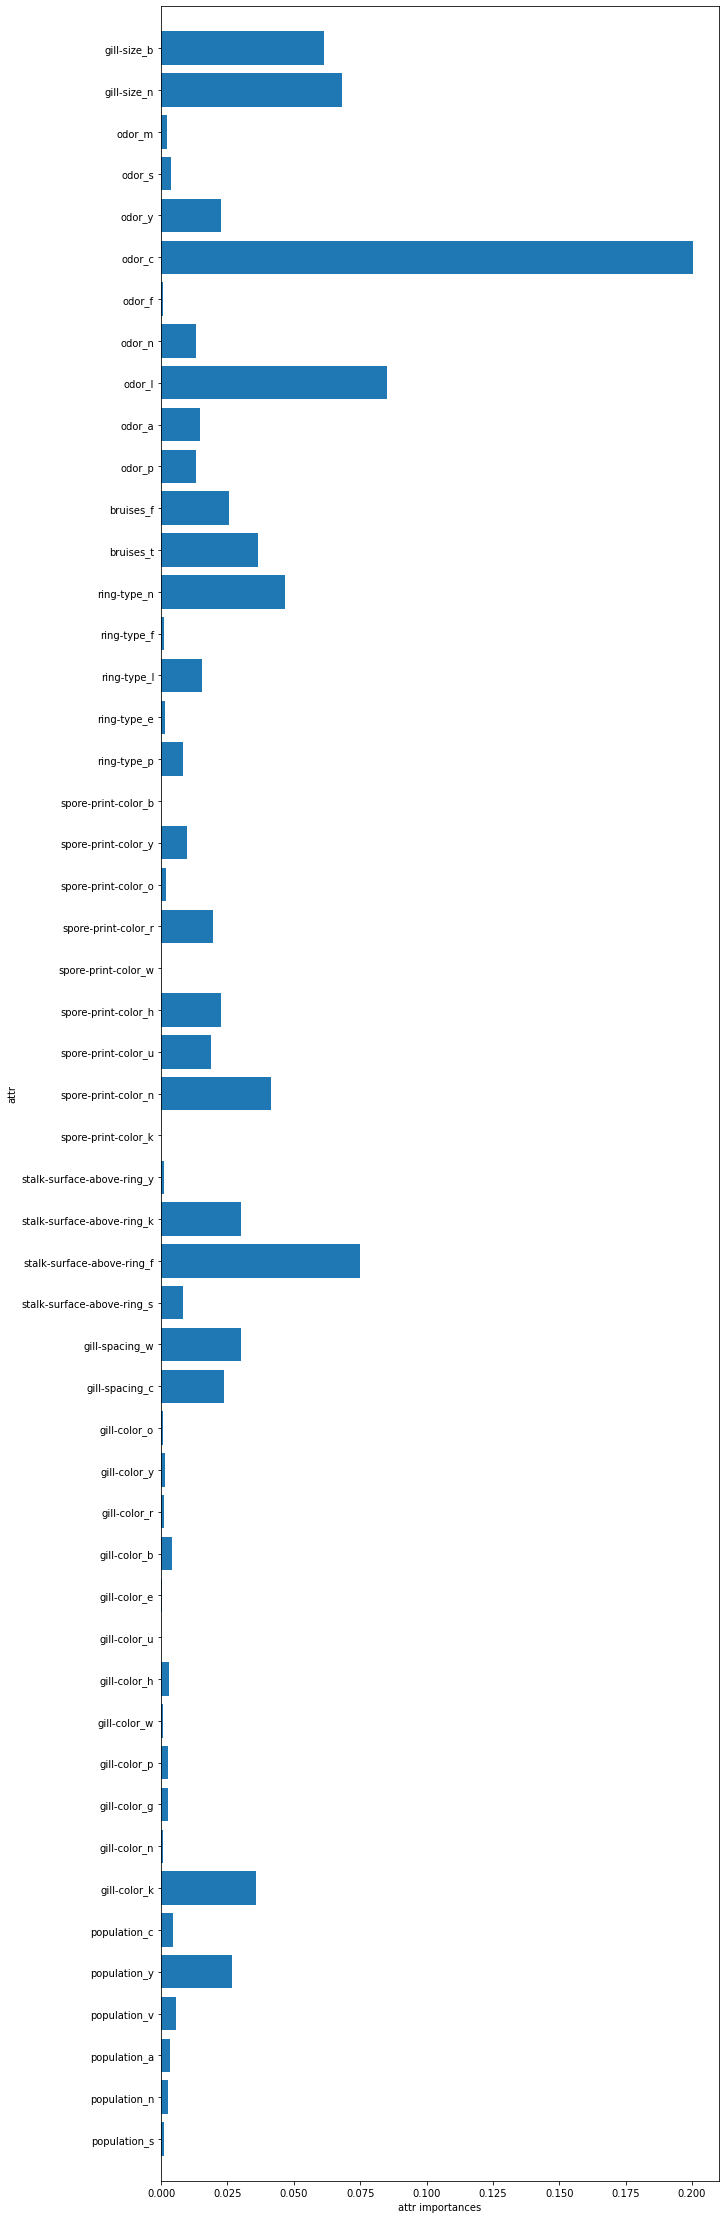

In [ ]:
def plot_feature_importances_cancer(model):
    
    n_features = X.shape[1]
    plt.barh(range(n_features), rf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), name_col)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    plt.show()
    
plt.figure(figsize=(10, 40))
plot_feature_importances_cancer(rf)

# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

[Train] 

5-fold CV Clasification report:

   accuracy  precision  recall   f1
0       1.0        1.0     1.0  1.0
1       1.0        1.0     1.0  1.0
2       1.0        1.0     1.0  1.0
3       1.0        1.0     1.0  1.0
4       1.0        1.0     1.0  1.0 


Mean Scores:

	accuracy: 1.0
	precision: 1.0
	recall: 1.0
	f1: 1.0


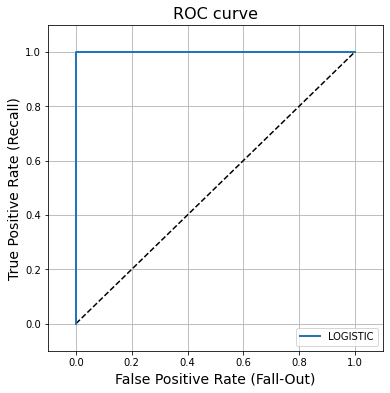


AUC:  0.9999999999999999


[Test] 

Confusion Matrix: 

[[3348    0]
 [   0 3151]] 

Test Accuracy:  1.0


In [ ]:
CV_check(xgb, X_train, y_train)
ROC_check(xgb, X_train, y_train)
error_result_check(xgb, X_train, y_train)

# LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

[Train] 

5-fold CV Clasification report:

   accuracy  precision  recall   f1
0       1.0        1.0     1.0  1.0
1       1.0        1.0     1.0  1.0
2       1.0        1.0     1.0  1.0
3       1.0        1.0     1.0  1.0
4       1.0        1.0     1.0  1.0 


Mean Scores:

	accuracy: 1.0
	precision: 1.0
	recall: 1.0
	f1: 1.0


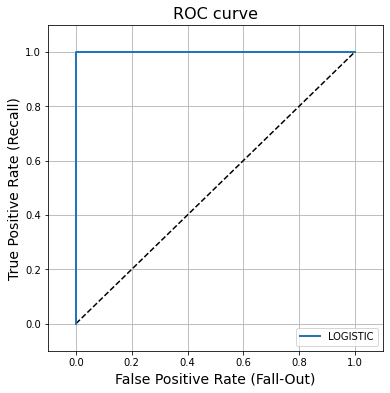


AUC:  1.0


[Test] 

Confusion Matrix: 

[[3348    0]
 [   0 3151]] 

Test Accuracy:  1.0


In [ ]:
CV_check(lgbm, X_train, y_train)
ROC_check(lgbm, X_train, y_train)
error_result_check(lgbm, X_train, y_train)

tree 기반 모델은 TEST에서 1, 간단한 모델도 충분히 잘 fitting되므로 변수 더 줄이기 (속도, 계산량 줄이기) -> 5개만 이용해서 하고 비교하기 (다음 jupyter notbook 4)